In [ ]:
import tensorflow as tf

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is available.")
    # Print the name of the GPU
    print("GPU Name:", gpu_available[0].name)
else:
    print("No GPU available. Please check your runtime settings.")

# Check if TensorFlow is using the GPU
print("Is TensorFlow using GPU?", tf.test.is_gpu_available())

GPU is available.
GPU Name: /physical_device:GPU:0
Is TensorFlow using GPU? True


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessandrasala79/ai-vs-human-generated-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ai-vs-human-generated-dataset' dataset.
Path to dataset files: /kaggle/input/ai-vs-human-generated-dataset


In [ ]:
import os

dataset_path = "/kaggle/input/ai-vs-human-generated-dataset"

# List all files and directories in the dataset path
all_items = os.listdir(dataset_path)

print("Contents of the dataset directory:")
for item in all_items:
    print(item)

Contents of the dataset directory:
test_data_v2
train.csv
test.csv
train_data


Found 85490 image files.
Displaying the first 5 images:
Displaying image 1: 37a05f4fddf84ac6bd2a9d49446c4c95.jpg


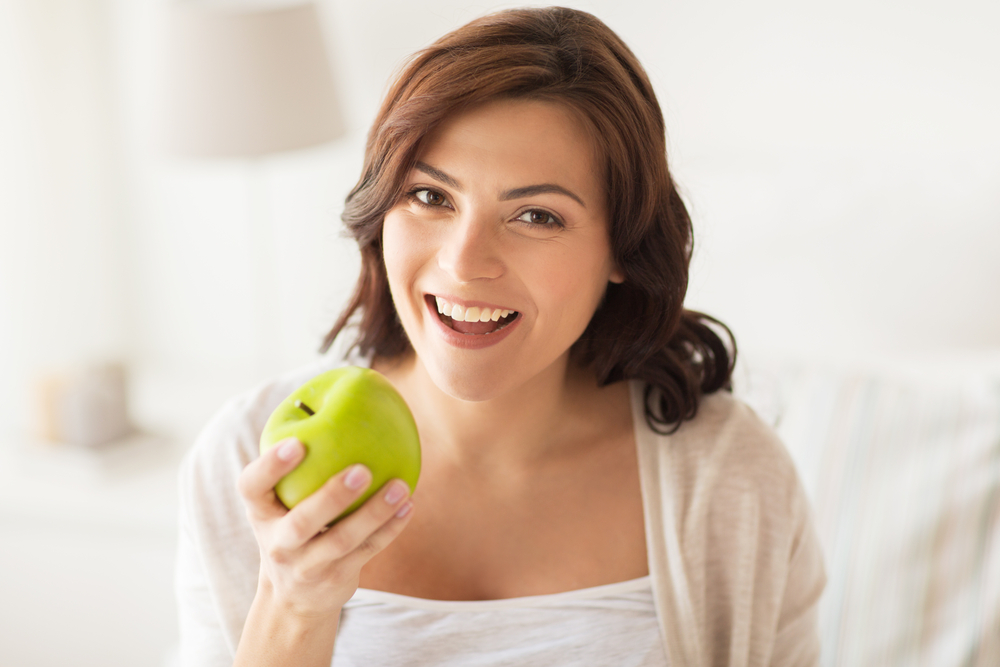

Displaying image 2: 3e74f0546c5d4b7797aca68370e6ccf0.jpg


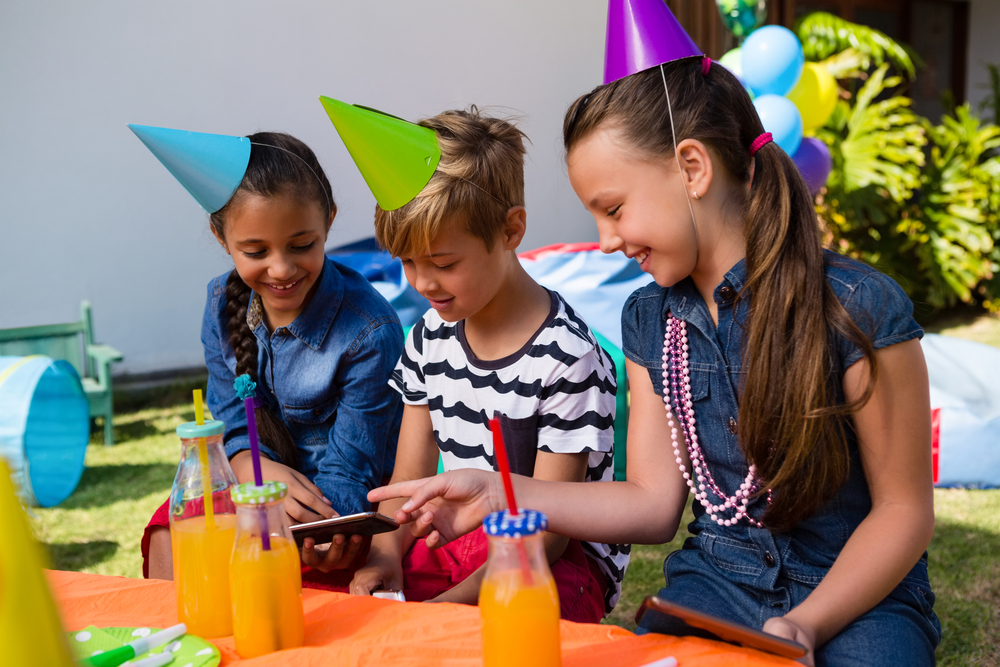

Displaying image 3: 8e2aaa5b998a423e9c90df1c474a5351.jpg


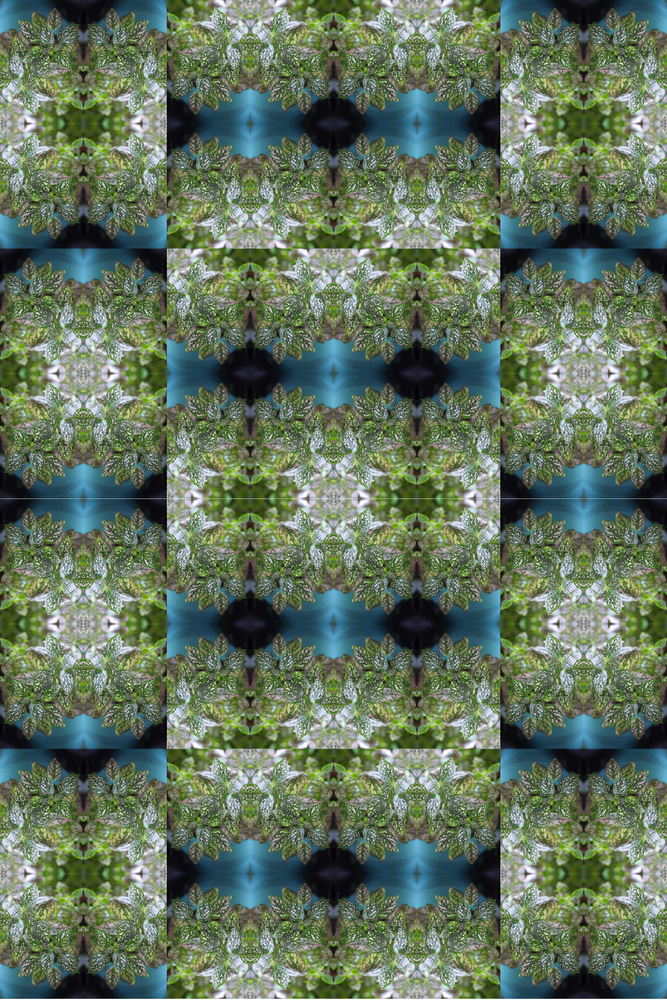

Displaying image 4: 47e9890ed55947ebb7cbe71c1fe24171.jpg


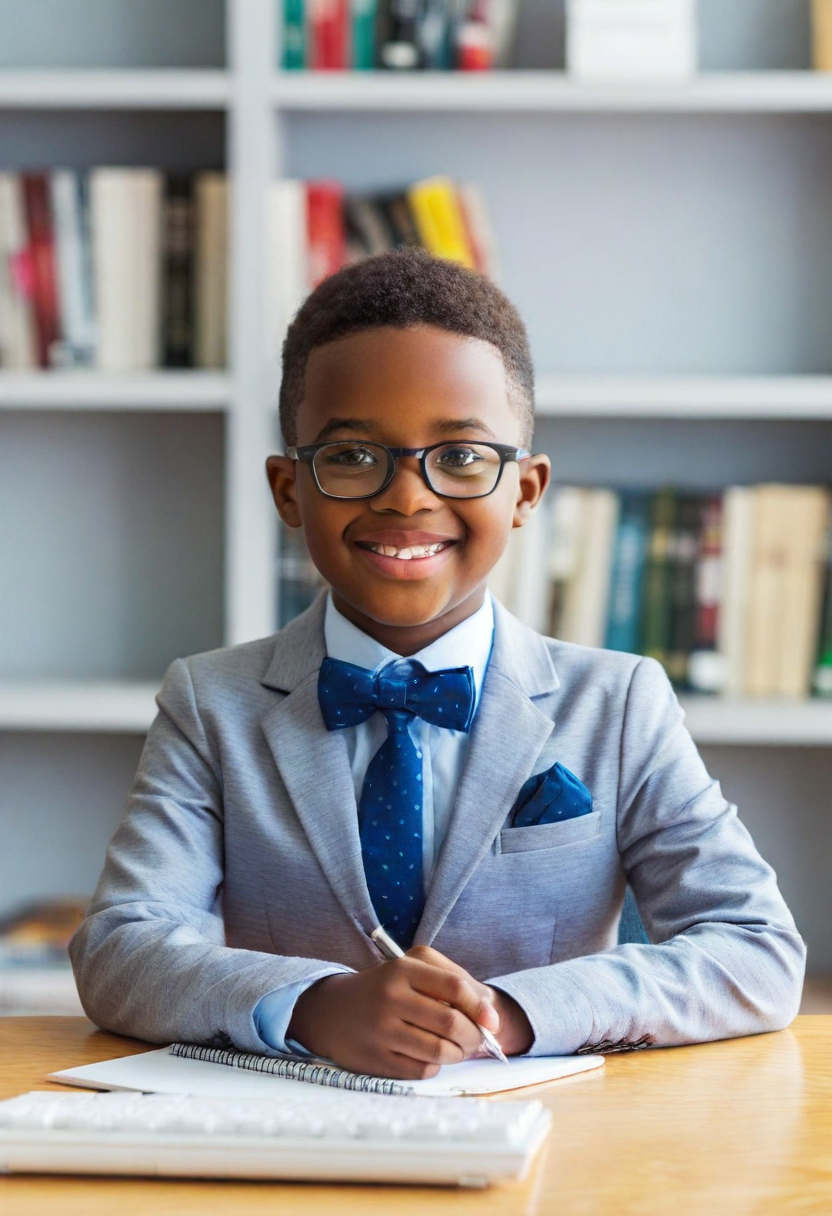

Displaying image 5: c40c353852d944f6b555413b89706eba.jpg


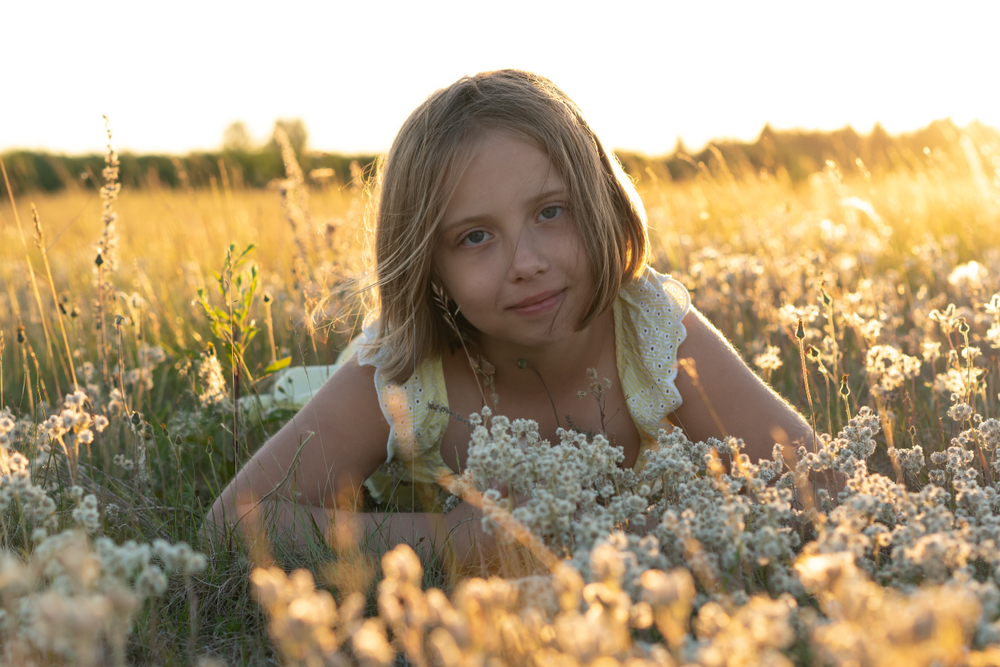

In [ ]:
import os
from IPython.display import Image, display

# The path to the downloaded dataset
dataset_path = "/kaggle/input/ai-vs-human-generated-dataset"

image_files = []
# Walk through the dataset directory and its subdirectories
for root, _, files in os.walk(dataset_path):
    for file in files:
        # Check if the file is an image
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            image_files.append(os.path.join(root, file))

if not image_files:
    print("No image files found in the dataset directory or its subdirectories.")
else:
    print(f"Found {len(image_files)} image files.")
    # Display the first 5 images
    print("Displaying the first 5 images:")
    for i, image_path in enumerate(image_files[:5]):
        print(f"Displaying image {i+1}: {os.path.basename(image_path)}")
        display(Image(filename=image_path))

In [ ]:
import pandas as pd
import os

train_csv_path = os.path.join(dataset_path, 'train.csv')

# Check if train.csv exists
if os.path.exists(train_csv_path):
    # Read the train.csv file into a pandas DataFrame
    train_df = pd.read_csv(train_csv_path)

    # Display the first few rows
    print("First 5 rows of train.csv:")
    display(train_df.head())

    # Display relevant details about the DataFrame
    print("\nDataFrame Info:")
    train_df.info()

    # Check for class balance (assuming a 'label' or 'class' column exists)
    # You might need to adjust the column name based on your CSV file
    if 'label' in train_df.columns:
        print("\nClass Balance:")
        display(train_df['label'].value_counts())
    elif 'class' in train_df.columns:
        print("\nClass Balance:")
        display(train_df['class'].value_counts())
    else:
        print("\nCould not find a 'label' or 'class' column for class balance check.")

else:
    print(f"train.csv not found at {train_csv_path}")

First 5 rows of train.csv:


Unnamed: 0                                        file_name  label
0           0  train_data/a6dcb93f596a43249135678dfcfc17ea.jpg      1
1           1  train_data/041be3153810433ab146bc97d5af505c.jpg      0
2           2  train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg      1
3           3  train_data/8542fe161d9147be8e835e50c0de39cd.jpg      0
4           4  train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg      1


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79950 entries, 0 to 79949
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  79950 non-null  int64 
 1   file_name   79950 non-null  object
 2   label       79950 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ MB

Class Balance:


label
1    39975
0    39975
Name: count, dtype: int64

### Check corrupt file

In [ ]:

import PIL.Image # Import PIL and refer to Image as PIL.Image



corrupt_files = []
print(f"Checking {len(image_files)} image files for corruption...")

for i, image_path in enumerate(image_files):
    if (i + 1) % 1000 == 0:
        print(f"Checking file {i+1}/{len(image_files)}: {os.path.basename(image_path)}")
    try:
        # Attempt to open the image file using PIL.Image
        img = PIL.Image.open(image_path)
        # Verify the image integrity (this will catch most corruption issues)
        img.verify()
    except (IOError, SyntaxError) as e:
        # If an exception is raised, the file is likely corrupt
        corrupt_files.append(image_path)
        print(f"Corrupt file found: {image_path} - Error: {e}")

if not corrupt_files:
    print("\nNo corrupt image files found.")
else:
    print(f"\nFound {len(corrupt_files)} corrupt image files:")
    for corrupt_file in corrupt_files:
        print(corrupt_file)

### Normalize image formats

In [ ]:

normalized_images_dir = "/kaggle/working/normalized_images"

# Create the directory for normalized images if it doesn't exist
os.makedirs(normalized_images_dir, exist_ok=True)

print(f"Found {len(image_files)} image files to normalize.")

for i, image_path in enumerate(image_files):
    if (i + 1) % 1000 == 0:
        print(f"Processing file {i+1}/{len(image_files)}: {os.path.basename(image_path)}")
    try:
        # Open the image file
        img = PIL.Image.open(image_path)

        # Convert to RGB if necessary
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Create a new filename with a consistent extension (.jpg)
        base_name = os.path.basename(image_path)
        name, ext = os.path.splitext(base_name)
        new_name = name + '.jpg'
        new_path = os.path.join(normalized_images_dir, new_name)

        # Save the normalized image
        img.save(new_path, 'JPEG')

    except Exception as e:
        print(f"Could not process file: {image_path} - Error: {e}")

print("\nNormalization complete.")

Found 85490 image files to normalize.
Processing file 1000/85490: ce5e9a7997864ff4850aefe8ec1331a8.jpg
Processing file 2000/85490: a673591d82ff41a7bd884ea6ed1a8bc7.jpg
Processing file 3000/85490: 04b798e7a7744bc0836cc2d031116d39.jpg
Processing file 4000/85490: 40deebb92b314a9eb252607ac9662856.jpg
Processing file 5000/85490: cb01e171068543d28ace40ad2d97d6ae.jpg
Processing file 6000/85490: 2b582e1a8dc142c088967341f9d9ca79.jpg
Processing file 7000/85490: a527eaebe2774b668b87ebf7f3119979.jpg
Processing file 8000/85490: 6ee512c2fa274a9bb1d04f888b2f6ac9.jpg
Processing file 9000/85490: 8b7e8317587b44aeb56a640e87af166c.jpg
Processing file 10000/85490: 19c59ce752db42eb9e6b8ceec1f49208.jpg
Processing file 11000/85490: c149f5220251493597437dac8a6b7d63.jpg
Processing file 12000/85490: 735196cbf58b4dc9b9ced226774e7630.jpg
Processing file 13000/85490: 8f0f53d3a01348f9b3a275377870e981.jpg
Processing file 14000/85490: 059401523cc141cf8753ae3cbbaa4f3a.jpg
Processing file 15000/85490: ff558c84b12a49e8bc

### Remove obviously duplicated files

In [ ]:
import os
import hashlib

# The directory containing the images to check for duplicates
# Using the normalized images directory created in the previous step
images_dir = "/kaggle/working/normalized_images"

# Dictionary to store file hashes and their corresponding file paths
hashes = {}
duplicates = []

print(f"Checking for duplicate files in {images_dir}...")

# Walk through the directory and its subdirectories
for root, _, files in os.walk(images_dir):
    for file in files:
        file_path = os.path.join(root, file)
        # Calculate the MD5 hash of the file content
        try:
            with open(file_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()

            # If the hash is already in the dictionary, it's a duplicate
            if file_hash in hashes:
                duplicates.append(file_path)
                # Optionally, you can also print the original file path
                # print(f"Duplicate found: {file_path} (original: {hashes[file_hash]})")
            else:
                hashes[file_hash] = file_path
        except Exception as e:
            print(f"Could not process file {file_path} for hashing: {e}")

if not duplicates:
    print("\nNo duplicate files found.")
else:
    print(f"\nFound {len(duplicates)} duplicate files.")
    print("Removing duplicate files...")
    # Remove the duplicate files
    for duplicate_file in duplicates:
        try:
            os.remove(duplicate_file)
            print(f"Removed: {duplicate_file}")
        except Exception as e:
            print(f"Could not remove duplicate file {duplicate_file}: {e}")

print("\nDuplicate removal process complete.")

Checking for duplicate files in /kaggle/working/normalized_images...

No duplicate files found.

Duplicate removal process complete.


In [ ]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Assuming train_df is already loaded and contains 'file_name' and 'label' columns
# If not, make sure to run the cell that loads train_df first.
if 'train_df' not in locals():
    print("Error: train_df not found. Please run the cell that loads train.csv first.")
else:
    # Define the base directory for the normalized images
    normalized_images_dir = "/kaggle/working/normalized_images"

    # Create directories for the splits
    train_dir = "/kaggle/working/train_split"
    val_dir = "/kaggle/working/val_split"
    test_dir = "/kaggle/working/test_split"

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Add the full path to the normalized images in the dataframe
    train_df['normalized_file_path'] = train_df['file_name'].apply(
        lambda x: os.path.join(normalized_images_dir, os.path.basename(x).split('.')[0] + '.jpg')
    )

    # Filter out rows where the normalized image file doesn't exist
    initial_image_count = len(train_df)
    train_df = train_df[train_df['normalized_file_path'].apply(os.path.exists)]
    if len(train_df) < initial_image_count:
        print(f"Warning: {initial_image_count - len(train_df)} images from train.csv were not found in the normalized images directory and will be excluded from the split.")


    # Split the data into training (70%) and a temporary set (30% for val + test)
    train_data, temp_data = train_test_split(
        train_df, test_size=0.3, random_state=42, stratify=train_df['label']
    )

    # Split the temporary set into validation (15%) and test (15%)
    # Since temp_data is 30% of the original, splitting it 50/50 gives 15% each
    val_data, test_data = train_test_split(
        temp_data, test_size=0.5, random_state=42, stratify=temp_data['label']
    )

    print(f"Original dataset size: {len(train_df)}")
    print(f"Train set size: {len(train_data)}")
    print(f"Validation set size: {len(val_data)}")
    print(f"Test set size: {len(test_data)}")

    # Function to copy files to their respective split directories
    def copy_files(dataframe, dest_dir):
        for index, row in dataframe.iterrows():
            src_path = row['normalized_file_path']
            # Maintain the label as a subdirectory (optional but good practice for image datasets)
            label_dir = os.path.join(dest_dir, str(row['label']))
            os.makedirs(label_dir, exist_ok=True)
            dest_path = os.path.join(label_dir, os.path.basename(src_path))
            try:
                shutil.copy(src_path, dest_path)
            except FileNotFoundError:
                print(f"Warning: Source file not found during copy: {src_path}")


    print("\nCopying files to split directories...")
    copy_files(train_data, train_dir)
    copy_files(val_data, val_dir)
    copy_files(test_data, test_dir)
    print("File splitting and copying complete.")

Original dataset size: 79950
Train set size: 55965
Validation set size: 11992
Test set size: 11993

Copying files to split directories...
File splitting and copying complete.


In [ ]:
import os
import PIL.Image
import numpy as np

def preprocess_image(image_path, target_size=(224, 224)):
    """
    Loads, resizes, and normalizes an image.

    Args:
        image_path (str): The path to the image file.
        target_size (tuple): The desired size (width, height) for resizing.

    Returns:
        numpy.ndarray: The preprocessed image as a NumPy array with pixel values normalized to [0, 1].
                       Returns None if the image cannot be processed.
    """
    try:
        # Open the image file
        img = PIL.Image.open(image_path)

        # Convert to RGB if necessary (consistent with earlier normalization)
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Resize the image
        img = img.resize(target_size)

        # Convert the image to a NumPy array
        img_array = np.array(img)

        # Normalize pixel values to [0, 1]
        img_array = img_array.astype(np.float32) / 255.0

        return img_array

    except Exception as e:
        print(f"Could not preprocess image {image_path}: {e}")
        return None



In [ ]:
import numpy as np
import os

# Assuming train_data DataFrame and preprocess_image function are defined

if 'train_data' in locals() and not train_data.empty:
    print("Preprocessing images for the training set...")

    # Initialize lists to store preprocessed images and labels
    train_images = []
    train_labels = []

    # Iterate through the training data DataFrame
    for index, row in train_data.iterrows():
        image_path = row['normalized_file_path']
        label = row['label']

        # Preprocess the image
        preprocessed_img = preprocess_image(image_path)

        # Append the preprocessed image and label if preprocessing was successful
        if preprocessed_img is not None:
            train_images.append(preprocessed_img)
            train_labels.append(label)

    # Convert the lists to NumPy arrays
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)

    print("Preprocessing for training set complete.")
    print("Shape of train_images:", train_images.shape)
    print("Shape of train_labels:", train_labels.shape)


    val_images = []
    val_labels = []
    for index, row in val_data.iterrows():
        image_path = row['normalized_file_path']
        label = row['label']
        preprocessed_img = preprocess_image(image_path)
        if preprocessed_img is not None:
            val_images.append(preprocessed_img)
            val_labels.append(label)
    val_images = np.array(val_images)
    val_labels = np.array(val_labels)

    test_images = []
    test_labels = []
    for index, row in test_data.iterrows():
        image_path = row['normalized_file_path']
        label = row['label']
        preprocessed_img = preprocess_image(image_path)
        if preprocessed_img is not None:
            test_images.append(preprocessed_img)
            test_labels.append(label)
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)


else:
    print("train_data DataFrame not found or is empty. Please ensure the data splitting step was completed successfully.")

In [ ]:
import tensorflow as tf
import numpy as np

def random_flip(image):
    """Randomly flips the image horizontally or vertically."""
    return tf.image.random_flip_left_right(tf.image.random_flip_up_down(image))

def random_rotation(image, max_angle=20):
    """Randomly rotates the image by a specified maximum angle."""
    # Convert degrees to radians
    max_angle_rad = max_angle * np.pi / 180
    return tf.keras.preprocessing.image.random_rotation(image, rg=max_angle, row_axis=0, col_axis=1, channel_axis=2)

def random_brightness(image, max_delta=0.2):
    """Randomly changes the brightness of the image."""
    return tf.image.random_brightness(image, max_delta=max_delta)

def random_zoom(image, zoom_range=(0.8, 1.2)):
    """Randomly zooms into or out of the image."""
    # random_zoom in tf.keras.preprocessing.image is for batch processing.
    # For single image, we can use tf.image.crop_and_resize with random bounding boxes
    # or implement zoom manually. Using a simpler approach for single image here.
    # This is a basic implementation and might not be exactly like Keras's random_zoom
    img_shape = tf.shape(image)
    h, w = img_shape[0], img_shape[1]
    zoom_factor = tf.random.uniform([], minval=zoom_range[0], maxval=zoom_range[1])
    new_h = tf.cast(tf.cast(h, tf.float32) / zoom_factor, tf.int32)
    new_w = tf.cast(tf.cast(w, tf.float32) / zoom_factor, tf.int32)
    # Ensure new dimensions are not larger than original
    new_h = tf.minimum(new_h, h)
    new_w = tf.minimum(new_w, w)
    image = tf.image.resize(image, [new_h, new_w])
    image = tf.image.pad_to_bounding_box(image, (h - new_h) // 2, (w - new_w) // 2, h, w)
    return image


def cutout(image, mask_size=16):
    """Applies Cutout augmentation to the image."""
    img_shape = tf.shape(image)
    h, w, c = img_shape[0], img_shape[1], img_shape[2]

    # Generate a random bounding box for the cutout
    cutout_h = tf.random.uniform([], minval=0, maxval=mask_size, dtype=tf.int32)
    cutout_w = tf.random.uniform([], minval=0, maxval=mask_size, dtype=tf.int32)
    center_h = tf.random.uniform([], minval=0, maxval=h, dtype=tf.int32)
    center_w = tf.random.uniform([], minval=0, maxval=w, dtype=tf.int32)

    # Define the coordinates of the cutout box
    y1 = tf.maximum(0, center_h - cutout_h // 2)
    x1 = tf.maximum(0, center_w - cutout_w // 2)
    y2 = tf.minimum(h, center_h + cutout_h // 2)
    x2 = tf.minimum(w, center_w + cutout_w // 2)

    # Create a mask with zeros in the cutout region
    mask = tf.concat([
        tf.ones((y1, w, c), dtype=tf.float32),
        tf.concat([
            tf.ones((y2 - y1, x1, c), dtype=tf.float32),
            tf.zeros((y2 - y1, x2 - x1, c), dtype=tf.float32),
            tf.ones((y2 - y1, w - x2, c), dtype=tf.float32),
        ], axis=1),
        tf.ones((h - y2, w, c), dtype=tf.float32),
    ], axis=0)

    return image * mask

# CutMix requires batch processing and label mixing, so it's typically applied
# as part of the data loading pipeline for batches, not to individual images here.
# A placeholder function is included for completeness but its implementation
# would be different.
# def cutmix(image, label, alpha=1.0):
#     """Placeholder for CutMix augmentation (requires batch processing)."""
#     # Implementation depends on batching and mixing images/labels from different examples
#     pass

def apply_augmentations(image, label):
    """Applies a set of random augmentations to an image and its label."""
    # Convert image to TensorFlow tensor for augmentation functions
    image = tf.convert_to_tensor(image, dtype=tf.float32)

    # Apply augmentations randomly
    if tf.random.uniform([]) > 0.5:
        image = random_flip(image)
    if tf.random.uniform([]) > 0.5:
        image = random_rotation(image)
    if tf.random.uniform([]) > 0.5:
        image = random_brightness(image)
    if tf.random.uniform([]) > 0.5:
        image = random_zoom(image)
    if tf.random.uniform([]) > 0.5:
        image = cutout(image)

    # Ensure the image remains in the [0, 1] range after augmentations
    image = tf.clip_by_value(image, 0.0, 1.0)

    return image.numpy(), label # Convert back to NumPy array if needed




In [ ]:
import numpy as np
import os

# Assuming train_data DataFrame and preprocess_image, apply_augmentations functions are defined

if 'train_data' in locals() and not train_data.empty:
    print("Preprocessing and augmenting images for the training set...")

    # Initialize lists to store preprocessed and augmented images and labels
    train_images_augmented = []
    train_labels_augmented = []

    # Iterate through the training data DataFrame
    for index, row in train_data.iterrows():
        image_path = row['normalized_file_path']
        label = row['label']

        # Preprocess the image (resize and normalize)
        preprocessed_img = preprocess_image(image_path)

        # Apply augmentations ONLY to the training set
        if preprocessed_img is not None:
            augmented_img, augmented_label = apply_augmentations(preprocessed_img, label)
            train_images_augmented.append(augmented_img)
            train_labels_augmented.append(augmented_label)

    # Convert the lists to NumPy arrays
    train_images_augmented = np.array(train_images_augmented)
    train_labels_augmented = np.array(train_labels_augmented)

    print("Preprocessing and augmentation for training set complete.")
    print("Shape of train_images_augmented:", train_images_augmented.shape)
    print("Shape of train_labels_augmented:", train_labels_augmented.shape)

else:
    print("train_data DataFrame not found or is empty. Please ensure the data splitting step was completed successfully.")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input shape based on your preprocessed images (height, width, channels)
# Assuming images are resized to 224x224 and are RGB (3 channels)
input_shape = (224, 224, 3)
num_classes = 2  # Assuming binary classification (AI vs Human)

# Create a simple Sequential CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Add dropout for regularization
    Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Display the model summary
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

# Define callback for Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define callback for Model Checkpoint
# Create a directory to save checkpoints if it doesn't exist
checkpoint_dir = "/kaggle/working/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
model_checkpoint = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'best_model.keras'), # Use .keras extension
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True, # Save only the best weights
    mode='min',          # The monitoring quantity should be minimized
    verbose=1            # Log when a checkpoint is saved
)

# Define callback for ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=5,          # Number of epochs with no improvement after which learning rate will be reduced.
    min_lr=0.00001,      # Lower bound on the learning rate.
    mode='min',          # The monitoring quantity should be minimized
    verbose=1            # Log when learning rate is reduced
)

# List of callbacks to use during training
callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Now you can train your model using these callbacks.

history = model.fit(
    train_images_augmented, # Your augmented training images (NumPy array)
    train_labels_augmented,   # Your training labels (NumPy array)
    epochs=50,              # Set a sufficiently large number of epochs
    batch_size=32,          # Choose an appropriate batch size
    validation_data=(val_images, val_labels), # Your validation data
    callbacks=callbacks     # Pass the list of callbacks
)

print("Callbacks defined and ready for use in model training.")

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the model is trained and val_images, val_labels, test_images, test_labels are available

if 'model' in locals():
    print("Evaluating the model on the validation set...")
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    print("\nEvaluating the model on the test set...")
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Make predictions on the test set
    y_pred_prob = model.predict(test_images)

    # --- Thresholding for Binary Classification ---
    # The model outputs probabilities for each class. For binary classification,
    # the output is typically probabilities for class 0 and class 1.
    # We need to choose a threshold to convert these probabilities into class predictions.
    # The default threshold is 0.5. If the probability of class 1 is > 0.5, predict class 1, otherwise predict class 0.
    # You can adjust this threshold based on whether you want to prioritize precision or recall.

    # Using the default threshold of 0.5
    y_pred = np.argmax(y_pred_prob, axis=1)
    # Alternatively, for binary classification with softmax output:
    # y_pred = (y_pred_prob[:, 1] > 0.5).astype(int)


    # Calculate other relevant metrics
    print("\nClassification Report on Test Set:")
    print(classification_report(test_labels, y_pred))

    print("\nConfusion Matrix on Test Set:")
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # You can also calculate individual metrics:
    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred)
    recall = recall_score(test_labels, y_pred)
    f1 = f1_score(test_labels, y_pred)

    print(f"\nTest Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1-score: {f1:.4f}")

else:
    print("Model not found. Please train the model first.")

### Load Best Model for Predictions

In [ ]:
import tensorflow as tf
import os

# Load the best model saved during training
checkpoint_dir = "/kaggle/working/checkpoints"
best_model_path = os.path.join(checkpoint_dir, 'best_model.keras')

if os.path.exists(best_model_path):
    print(f"Loading best model from {best_model_path}...")
    model = tf.keras.models.load_model(best_model_path)
    print("Best model loaded successfully!")
    print("\nModel summary:")
    model.summary()
else:
    print(f"Best model not found at {best_model_path}")
    print("Using the current model in memory (if available)")

### Load Test Data for Submission

In [ ]:
import pandas as pd
import os

# Load the test.csv file to get the submission format
test_csv_path = os.path.join(dataset_path, 'test.csv')

if os.path.exists(test_csv_path):
    test_submission_df = pd.read_csv(test_csv_path)
    print("Test CSV loaded successfully!")
    print(f"Number of rows: {len(test_submission_df)}")
    print("\nFirst few rows of test.csv:")
    display(test_submission_df.head())
    print("\nColumns in test.csv:")
    print(test_submission_df.columns.tolist())
else:
    print(f"test.csv not found at {test_csv_path}")

# Check the test_data_v2 directory
test_data_dir = os.path.join(dataset_path, 'test_data_v2')
if os.path.exists(test_data_dir):
    test_image_files = []
    for root, _, files in os.walk(test_data_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                test_image_files.append(os.path.join(root, file))
    print(f"\nFound {len(test_image_files)} test images in test_data_v2 directory")
else:
    print(f"\ntest_data_v2 directory not found at {test_data_dir}")

### Preprocess Test Images for Prediction

In [ ]:
import numpy as np
from tqdm import tqdm

# Preprocess test images
if 'test_submission_df' in locals() and 'test_image_files' in locals():
    print("Preprocessing test images...")
    
    test_images_for_prediction = []
    test_filenames = []
    
    # Create a mapping of filename to full path
    filename_to_path = {}
    for img_path in test_image_files:
        filename = os.path.basename(img_path)
        filename_to_path[filename] = img_path
    
    # Process images in the order they appear in test.csv
    for index, row in test_submission_df.iterrows():
        filename = row['file_name'] if 'file_name' in row else row.iloc[0]
        
        # Try to find the image file
        img_path = None
        if filename in filename_to_path:
            img_path = filename_to_path[filename]
        else:
            # Try matching without extension or with different extension
            base_name = os.path.splitext(filename)[0]
            for fn, path in filename_to_path.items():
                if os.path.splitext(fn)[0] == base_name:
                    img_path = path
                    break
        
        if img_path:
            preprocessed_img = preprocess_image(img_path)
            if preprocessed_img is not None:
                test_images_for_prediction.append(preprocessed_img)
                test_filenames.append(filename)
            else:
                print(f"Warning: Could not preprocess {filename}")
        else:
            print(f"Warning: Image file not found for {filename}")
    
    test_images_for_prediction = np.array(test_images_for_prediction)
    
    print(f"\nPreprocessing complete!")
    print(f"Number of test images preprocessed: {len(test_images_for_prediction)}")
    print(f"Shape of test_images_for_prediction: {test_images_for_prediction.shape}")
else:
    print("Error: test_submission_df or test_image_files not found. Please run the previous cell first.")

### Make Predictions on Test Set

In [ ]:
import numpy as np

if 'model' in locals() and 'test_images_for_prediction' in locals():
    print("Making predictions on test images...")
    
    # Make predictions
    test_predictions_prob = model.predict(test_images_for_prediction, batch_size=32, verbose=1)
    
    # Get the predicted class (0 or 1)
    test_predictions = np.argmax(test_predictions_prob, axis=1)
    
    print(f"\nPredictions complete!")
    print(f"Number of predictions: {len(test_predictions)}")
    print(f"\nPrediction distribution:")
    print(f"Class 0 (Human): {np.sum(test_predictions == 0)} ({np.sum(test_predictions == 0)/len(test_predictions)*100:.2f}%)")
    print(f"Class 1 (AI): {np.sum(test_predictions == 1)} ({np.sum(test_predictions == 1)/len(test_predictions)*100:.2f}%)")
    
    # Show some sample predictions
    print("\nSample predictions:")
    for i in range(min(10, len(test_predictions))):
        print(f"{test_filenames[i]}: {test_predictions[i]} (confidence: {test_predictions_prob[i][test_predictions[i]]:.4f})")
else:
    print("Error: Model or test_images_for_prediction not found. Please train the model and preprocess test images first.")

### Create Submission File

In [ ]:
import pandas as pd
import os

if 'test_predictions' in locals() and 'test_submission_df' in locals():
    print("Creating submission file...")
    
    # Create submission dataframe
    submission_df = test_submission_df.copy()
    
    # Add predictions to the dataframe
    # Assuming the submission format requires 'file_name' and 'label' columns
    if 'label' in submission_df.columns:
        # Update the label column with predictions
        submission_df['label'] = test_predictions[:len(submission_df)]
    else:
        # Add label column if it doesn't exist
        submission_df['label'] = test_predictions[:len(submission_df)]
    
    # Ensure we have exactly 5540 rows
    if len(submission_df) != 5540:
        print(f"Warning: Submission file has {len(submission_df)} rows, expected 5540")
    
    # Save the submission file
    submission_path = "/kaggle/working/submission.csv"
    submission_df.to_csv(submission_path, index=False)
    
    print(f"\nSubmission file created successfully!")
    print(f"Saved to: {submission_path}")
    print(f"Number of rows: {len(submission_df)}")
    print(f"\nFirst few rows of submission file:")
    display(submission_df.head(10))
    
    print(f"\nLast few rows of submission file:")
    display(submission_df.tail(10))
    
    # Verify the submission format
    print(f"\nSubmission file columns: {submission_df.columns.tolist()}")
    print(f"Submission file shape: {submission_df.shape}")
    
    # Check prediction distribution
    print(f"\nPrediction distribution in submission:")
    print(submission_df['label'].value_counts())
    
else:
    print("Error: test_predictions or test_submission_df not found. Please run the prediction step first.")